# 텍스트 데이터 전처리 및 분석

## 텍스트 분석 수행 프로세스
#### 1. 텍스트 전처리
- 클렌징(cleansing)
    - 특수문자, 기호 필요없는 문자 제거
    - 대소문자 변경 (보통은 소문자로 바꾼다)
- stop word(분석에 필요 없는 토큰) 제거
    - 우리가 분석하려는 문장에서 필요없는 단어들; 의미와 관련 없는 단어/글자들
    - 예) 문법적으로 들어가는 단어들 (조사, 전치사 등) -- 이런것들은 의미와는 관련이 없기에 제거한다
- 텍스트 토큰화
    - 분석의 최소단위로 나누는/분류하는 작업 --> 이 쪼개진 애들을 '토큰'이라고 한다
    - 토큰의 단위는 정해진 것이 없다 -- 우리가 정하기 나름
    - 단어가 최소단위일 수도 있고, 알파벳글자 하나가 최소단위일 수도 있고
    - 보통 단어단위나 글자단위로 나눈다.
- 어근 추출(Stemming/Lemmatization)을 통한 텍스트 정규화 작업
    - 같은 글자인데 다르게 나오는 경우 (동사인데 과겨형이면 뒤에 ed가 붙거나, 3인칭일때 s가 붙는 것처럼; work = works 사실상 같은 의미인데) --> 그렇다면 글자를 통일시키는게 필요할 텐데 이런 작업을 어근추출이라고 한다

#### 2. Feature vectorization
- 문자열 비정형 데이터인 텍스트를 숫자타입의 정형데이터로 만드는 작업 (텍스트 --> 숫자)
- 단어 하나하나가 컬럼이 되고, 거기에 있는 값들은 내가 뭘 넣느냐엑 따라 달라질 수 있다 (그 단어 개수가 될 수도 있고, 그 단어가 있는지 없는지를 나타내는 것일 수도 있고, etc.)
- BOW와 Word2Vec

#### 3. 머신러닝 모델 수립, 학습, 예측, 평가

## 수집한 텍스트 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
np.random.seed(1)

In [216]:
text_dataset = pd.read_csv('./data_2015_2019/text_dataset_2015_2019.csv')

In [217]:
text_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153576 entries, 0 to 153575
Data columns (total 4 columns):
name              153576 non-null object
blurb             153574 non-null object
content           153549 non-null object
risk_challenge    153387 non-null object
dtypes: object(4)
memory usage: 4.7+ MB


In [ ]:
# name 컬럼 : 펀딩 제목
# blurb 컬럼 : 펀딩 부제목; 펀딩에 대한 간략한 소개글
# content 컬럼 : 펀딩에 대한 설명/본문
# risk_challenge : 펀딩 관련 리스크나 위험 요소

In [218]:
text_dataset.reset_index(inplace=True)

In [219]:
text_dataset.head(1)

,index,name,blurb,content,risk_challenge
0,0,"Strange Wit, an original graphic novel about J...","The true biography of the historical figure, w...","['Meet Jane Bowles: incredible author, inspiri...",The main obstacles this book faces are the siz...


In [220]:
# 결측치 조회
text_dataset.isna().sum()

index               0
name                0
blurb               2
content            27
risk_challenge    189
dtype: int64

## 텍스트 데이터 결측치 및 잡음(노이즈) 처리
- 공백이나 특수문자만 있는 데이터 조회 및 처리

In [221]:
# name 컬럼 조회
noise_list = ["[ ]", "[]", "['']", '[\\]', '[|]', '[?]', '[/]', '[=]', '[+]', '[_]', '[~]', '[`]', '[-]', '[,]', '[.]', "''", "", " ", ".", "..", "...", "......", "-", "_", "\'", "\"", "=", "+", "()", "{}", "\\", "|", ",", "/", "~", "`", "!", "@", "#", "$", "%", "^", "^^", "&", "*", "<", ">"]
text_dataset[text_dataset['name'].isin(noise_list)]

,index,name,blurb,content,risk_challenge


In [222]:
# blurb 컬럼 조회
noise_list = ["[ ]", "[]", "['']", '[\\]', '[|]', '[?]', '[/]', '[=]', '[+]', '[_]', '[~]', '[`]', '[-]', '[,]', '[.]', "''", "", " ", ".", "..", "...", "......", "-", "_", "\'", "\"", "=", "+", "()", "{}", "\\", "|", ",", "/", "~", "`", "!", "@", "#", "$", "%", "^", "^^", "&", "*", "<", ">"]
blurb_noise = text_dataset[text_dataset['blurb'].isin(noise_list)]
blurb_noise

,index,name,blurb,content,risk_challenge
59131,59131,Cancelled,-,"[""II'm raising funds to be able to create 2 cu...",The challenges I face during this project is m...
77435,77435,XXX,-,['xxxxxx'],xxxxx
89219,89219,Kicked Out,.,['The winner gets a once in a lifetime chance ...,.
92414,92414,Beacons To Guide Me Home - a new album by Gayl...,.,"[""So ... I've got this new album and I'd reall...",I don't foresee any risks to this project. Al...
92450,92450,B1,.,['.'],You can download now narrator in app store.
110374,110374,Beacons To Guide Me Home - a new album by Gayl...,.,"[""So ... I've got this new album and I'd reall...",I don't foresee any risks to this project. Al...


In [223]:
print(len(blurb_noise))
blurb_noise.index

6


Int64Index([59131, 77435, 89219, 92414, 92450, 110374], dtype='int64')

In [121]:
# blurb 컬럼
# 결측치 (2) --> 공백으로 변경
# 특수문자 (6) --> 공백

In [224]:
# 결측치 처리
text_dataset['blurb'].fillna(' ', inplace=True)

In [225]:
# 잡음 처리
text_dataset.loc[blurb_noise.index, 'blurb'] = ' '

In [234]:
# 변경 확인
print("결측치:", text_dataset['blurb'].isna().sum())
noise_list = ["[ ]", "[]", "['']", '[\\]', '[|]', '[?]', '[/]', '[=]', '[+]', '[_]', '[~]', '[`]', '[-]', '[,]', '[.]', "''", "", " ", ".", "..", "...", "......", "-", "_", "\'", "\"", "=", "+", "()", "{}", "\\", "|", ",", "/", "~", "`", "!", "@", "#", "$", "%", "^", "^^", "&", "*", "<", ">"]
print(text_dataset['blurb'].isin(noise_list).value_counts())
    # 총 8개를 ' '로 변경했으니 맞음
blurb_processed = text_dataset[text_dataset['blurb'].isin(noise_list)]
blurb_processed.head()

결측치: 0
False    150944
True          8
Name: blurb, dtype: int64


,index,name,blurb,content,risk_challenge
59131,59131,Cancelled,,"[""II'm raising funds to be able to create 2 cu...",The challenges I face during this project is m...
77435,77435,XXX,,['xxxxxx'],xxxxx
87701,87701,awlsies,,['n/a'],NaN
88902,88902,Ready to wear,,"['Sorry, due to some issues I had to delete th...",<N/A>
89219,89219,Kicked Out,,['The winner gets a once in a lifetime chance ...,.


In [227]:
# content 컬럼 조회
noise_list = ["[ ]", "[]", "['']", '[\\]', '[|]', '[?]', '[/]', '[=]', '[+]', '[_]', '[~]', '[`]', '[-]', '[,]', '[.]', "''", "", " ", ".", "..", "...", "......", "-", "_", "\'", "\"", "=", "+", "()", "{}", "\\", "|", ",", "/", "~", "`", "!", "@", "#", "$", "%", "^", "^^", "&", "*", "<", ">"]
content_noise = text_dataset[text_dataset['content'].isin(noise_list)]
content_noise

,index,name,blurb,content,risk_challenge
34,34,HELPING PETEY NATURE GET TO THE NEXT LEVEL,HELP A NEW NATIONAL RECORDING ARTIST OF FAITH ...,[],No challenges and no obstacles\r\nThis is very...
44,44,Remote Island Fish Camp,Rooting our children in their native culture b...,[],Challenges:\r\n\r\nFinding a suitable parcel o...
85,85,Guns & Grams,A story about the Sicilian Mob coming to the u...,[],I am a member Of the Screen Actors Union and a...
172,172,Travel to Italy with Michael Belardo,DON'T MISS THIS OPPORTUNITY TO BACK THIS BOOK....,[],"After a lifetime of travel in Italy, 25 years ..."
195,195,"""A Favor for A Favor"" by Vincent VenaCava","After his wife's infidelity, Jacob resolves to...",[],The only risks that we really face are technol...
...,...,...,...,...,...
153489,153489,Get us back into the studio to Record Souls Ta...,Blood Luxury will be recording their ep ... wh...,[],"This wont be an ongoing diatripe, I need the h..."
153498,153498,WAO NYLONG SHOES,Transforming Trash into Treasure,[],Our bigger challenge is to reach the minimum a...
153499,153499,Adventures in RandyLand,A travel adventure documentary series for YouT...,[],Some locations will be more difficult to acces...
153500,153500,Ento Superfoods,We farm healthy and sustainable protein for th...,[],Ento has worked extremely hard to reduce as mu...


In [228]:
print(len(content_noise))
content_noise.index

2597


Int64Index([    34,     44,     85,    172,    195,    219,    245,    301,
               370,    374,
            ...
            153375, 153419, 153426, 153427, 153441, 153489, 153498, 153499,
            153500, 153575],
           dtype='int64', length=2597)

In [ ]:
# content 컬럼
# 결측치 (27) --> 제거
# 특수문자 (2597) --> 제거
# 153576 - (27+2597)

In [229]:
# 결측치 처리
text_dataset.dropna(axis=0, subset=['content'], inplace=True)

In [230]:
# 잡음 처리
text_dataset.drop(index=content_noise.index, inplace=True)

In [204]:
print(27+2597)
153576 - (27+2597)

2624


150952

In [235]:
# 변경 확인
print("결측치:", text_dataset['content'].isna().sum())
noise_list = ["[ ]", "[]", "['']", '[\\]', '[|]', '[?]', '[/]', '[=]', '[+]', '[_]', '[~]', '[`]', '[-]', '[,]', '[.]', "''", "", " ", ".", "..", "...", "......", "-", "_", "\'", "\"", "=", "+", "()", "{}", "\\", "|", ",", "/", "~", "`", "!", "@", "#", "$", "%", "^", "^^", "&", "*", "<", ">"]
print(text_dataset['content'].isin(noise_list).value_counts())
content_processed = text_dataset[text_dataset['content'].isin(noise_list)]
content_processed.head()

결측치: 0
False    150952
Name: content, dtype: int64


,index,name,blurb,content,risk_challenge


In [236]:
# risk_challenge 컬럼 조회
noise_list = ["[ ]", "[]", "['']", '[\\]', '[|]', '[?]', '[/]', '[=]', '[+]', '[_]', '[~]', '[`]', '[-]', '[,]', '[.]', "''", "", " ", ".", "..", "...", "......", "-", "_", "\'", "\"", "=", "+", "()", "{}", "\\", "|", ",", "/", "~", "`", "!", "@", "#", "$", "%", "^", "^^", "&", "*", "<", ">"]
risk_noise = text_dataset[text_dataset['risk_challenge'].isin(noise_list)]
risk_noise

,index,name,blurb,content,risk_challenge
1349,1349,Geschichten sollen leben,19 Theaterstücke des Schnuppe Figurentheaters ...,"['Hallo liebe Interessierte,', 'mein Name ist ...",-
3311,3311,Wotever DIY Film Festival,WDIYFF is a London based film festival by and ...,"[""Started in 2012 as a one evening event, the ...",.
4207,4207,ORCA LEATHERCRAFT : Handcrafted Leather Boots...,"A versatile, durable, and waterproof premium f...",['The Orca Leathercraft footwear\xa0is traditi...,.
4575,4575,Dunλmis BackPack,No more worrying about being disconnected from...,"['How is that ?', 'It is a BackPack manufactur...",.
5034,5034,New York Symphony Orchestra: Concert,"The concert will take place on Nov 7, 2015 at ...","['In\xa0Beethoven Symphony No. 6, a contrast i...",.
...,...,...,...,...,...
152672,152672,THE ETERNAL CALENDAR,Beauty and sustainability meets in the design ...,['The ETERNAL CALENDAR is an architecturally ...,
152873,152873,ROMBO Picks - The new generation of guitar picks,eco-conscious. stylish. functional.,['Guitar picks are the bridge between you and ...,
153043,153043,FAEMARKET - A Fantasy RPG Anthology,Faemarket is a collaborative anthology with fi...,['You arrive in the first town you’ve seen all...,-
153073,153073,Euphoria,Euphoria is a short ﬁlm documenting the life o...,['Euphoria is a short ﬁlm documenting the life...,.


In [237]:
print(len(risk_noise))
risk_noise.index

4143


Int64Index([  1349,   3311,   4207,   4575,   5034,   5178,  10258,  10947,
             11387,  12544,
            ...
            152079, 152088, 152432, 152636, 152644, 152672, 152873, 153043,
            153073, 153339],
           dtype='int64', length=4143)

In [ ]:
# risk_challenge 컬럼
# 결측치 (189) --> 공백
# 특수문자 (4143) --> 공백

In [238]:
# 결측치 처리
text_dataset['risk_challenge'].fillna(' ', inplace=True)

In [239]:
# 잡음 처리
text_dataset.loc[risk_noise.index, 'risk_challenge'] = ' '

In [240]:
# 변경 확인
print("결측치:", text_dataset['risk_challenge'].isna().sum())
noise_list = ["[ ]", "[]", "['']", '[\\]', '[|]', '[?]', '[/]', '[=]', '[+]', '[_]', '[~]', '[`]', '[-]', '[,]', '[.]', "''", "", " ", ".", "..", "...", "......", "-", "_", "\'", "\"", "=", "+", "()", "{}", "\\", "|", ",", "/", "~", "`", "!", "@", "#", "$", "%", "^", "^^", "&", "*", "<", ">"]
print(text_dataset['risk_challenge'].isin(noise_list).value_counts())
    # 총 4301개 ' '로 변환
risk_processed = text_dataset[text_dataset['risk_challenge'].isin(noise_list)]
risk_processed.head()

결측치: 0
False    146651
True       4301
Name: risk_challenge, dtype: int64


,index,name,blurb,content,risk_challenge
420,420,PALS MAGAZINE,PALS MAGAZINE is an ode to the beauty of frien...,"[""WHAT IS PALS MAGAZINE?It will be published e...",
596,596,Sochi 2014,Sacked. Arrested. Beaten. Kidnapped. Tortured....,"[""A play directed by Josh Whatsize for IYAF in...",
1349,1349,Geschichten sollen leben,19 Theaterstücke des Schnuppe Figurentheaters ...,"['Hallo liebe Interessierte,', 'mein Name ist ...",
1616,1616,"High in Shanghai: business, blogging, exploring",Greek student in Germany gonna be in Shanghai ...,"[""Ladies and Gent's,"", ""As we know - time is m...",
3311,3311,Wotever DIY Film Festival,WDIYFF is a London based film festival by and ...,"[""Started in 2012 as a one evening event, the ...",


In [242]:
# 결측치 처리 후 조회
text_dataset.isna().sum()

index             0
name              0
blurb             0
content           0
risk_challenge    0
dtype: int64

In [244]:
# 결측치 및 잡음 처리후 데이터 수
text_dataset.shape

(150952, 5)

In [260]:
# conent 컬럼 데이터는 웹크롤링 시 리스트([ ])로 묶어서 가져왔기에
# 모든 content 컬럼 데이터는 [ ]에 쌓여 있다
print(text_dataset['content'][0][:10])

['Meet Jan


In [267]:
# content 컬럼 --> 대괄호 [ ] 제거
text_dataset['content'] = text_dataset['content'].apply(lambda x: x.replace('[', '').replace(']', ''))

In [268]:
# 변경 확인
print(text_dataset['content'][0][:10])
print(text_dataset['content'][0][-10:])

'Meet Jane
kstarter."


In [270]:
text_dataset.head(1)

,index,name,blurb,content,risk_challenge
0,0,"Strange Wit, an original graphic novel about J...","The true biography of the historical figure, w...","'Meet Jane Bowles: incredible author, inspirin...",The main obstacles this book faces are the siz...


In [271]:
#text_dataset.to_csv('./data_2015_2019/text_dataset_cleaned.csv', index=False, encoding='utf-8')

In [ ]:
# content 컬럼과 risk_challenge 컬럼의 택스트 데이터를 합치고, 그 합쳐진 것으로 전처리 및 모델에 적용
# content 컬럼 + risk_challenge 컬럼 결합 후 따로 DataFrame으로 만들어 저장

In [284]:
content_risk_merged = text_dataset['content']+text_dataset['risk_challenge']
content_risk_merged_df = pd.DataFrame(content_risk_merged, columns=['content_risk_merged']).reset_index()
content_risk_merged_df

,index,content_risk_merged
0,0,"'Meet Jane Bowles: incredible author, inspirin..."
1,1,"""I've always been passionate about efficiency,..."
2,2,"'Billet Dice', 'Billet Dice are made from bill..."
3,3,'With this film we want to entertain you in an...
4,4,'The Splash Drone is a fully waterproof quad c...
...,...,...
150947,153570,'Vivian is a New York–based design label start...
150948,153571,'Hello there! My name is Chloe and I’m the art...
150949,153572,"""For the relaunch of the Beastly Boutique, I w..."
150950,153573,'Your application to become a Produce Social M...


In [285]:
#content_risk_merged_df.to_csv('./data_2015_2019/content_risk_merged.csv', index=False, encoding='utf-8')

## 수집한 텍스트 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk import Text, FreqDist
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import sklearn
import string
import re

In [4]:
tf.__version__

'2.1.0'

In [6]:
# GPU 사용 여부 확인
print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices('GPU'))

True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [1]:
import pandas as pd
import numpy as np

content_risk_merged_df = pd.read_csv('./content_risk_merged.csv')

In [2]:
content_risk_merged_df.shape

(150952, 2)

In [5]:
content_risk_merged_df.head()

,index,content_risk_merged
0,0,"'Meet Jane Bowles: incredible author, inspirin..."
1,1,"""I've always been passionate about efficiency,..."
2,2,"'Billet Dice', 'Billet Dice are made from bill..."
3,3,'With this film we want to entertain you in an...
4,4,'The Splash Drone is a fully waterproof quad c...


In [7]:
content_risk_merged_df.memory_usage(deep=True)

Index                        128
index                    1207616
content_risk_merged    975025472
dtype: int64

In [8]:
#nltk.download('추가패키지명')

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/eodud0582/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/eodud0582/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/eodud0582/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package tagsets to
[nltk_data]     /home/eodud0582/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/eodud0582/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.sent_tokenize(text) #문장 단위 토큰화
nltk.word_tokenize(text) #단어 단위 토큰화
nltk.regexp_tokenize(text, '\d') #숫자만 토큰화
nltk.regexp_tokenize(text, '\w') #철자/글자(letter) 단위 토큰화
nltk.regexp_tokenize(text, r'\w+') #단어 단위 토큰화

In [ ]:
stopwords.fileids() #nltk가 지원하는 stopword 언어 조회
'''
['arabic','azerbaijani','danish','dutch','english','finnish',
'french','german','greek','hungarian','indonesian','italian',
'kazakh','nepali','norwegian','portuguese','romanian','russian',
'slovene','spanish','swedish','tajik','turkish']
'''
stopwords.words('언어') #지원되는 언어의 stopwords 조회

In [ ]:
content_risk_merged_df['content_risk_merged'][0]

In [335]:
'\\xa0' in content_risk_merged_df['content_risk_merged'][0] 

True

In [338]:
'\\t' in content_risk_merged_df['content_risk_merged'][0]

True

In [324]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [329]:
'\\' in string.punctuation

True

In [10]:
# Kickstarter 크라우드펀딩은 국가 분포는 영어권이 다수이지만, 다른 언어권의 펀딩들도 있기에 
# nltk가 지원하는 stopword 언어의 모든 stopwords를 사용할 것이다
len(stopwords.words(stopwords.fileids()))

6800

In [71]:
string.digits

'0123456789'

In [3]:
# 텍스트 전처리 함수
def text_preprocessing(document):
    #소문자 변환
    document = document.lower()
    
    #추가로 발견한 노이즈 제거
    document = document.replace('\\xa0', ' ')
    document = document.replace('\\t', ' ')
    document = document.replace('\\n', ' ')
    
    #특수문자 제거
    punct_pattern = '[{}]'.format(string.punctuation)
    document = re.sub(punct_pattern, ' ', document)
    
    #숫자 제거
    document = re.sub(r'\d+', ' ', document)
        #digit_pattern = '[{}]'.format(string.digits)
        #document = re.sub(digit_pattern, ' ', document)
    
    #stopword 제거, stemming 처리 및 토큰화
    stop_words = stopwords.words(stopwords.fileids()) #지원되는 모든 stopwords
    stop_words.extend(['“','”','‘','’','•']) #추가로 발견한 특수문자
    stemmer = PorterStemmer() #어간 추출
    word_token = nltk.word_tokenize(document)
    result_token = [stemmer.stem(word) for word in word_token if word not in stop_words and len(word) > 2]
        # 불용어이고 문자/철자 수가 2개 이하인 단어는 제거
    
    return result_token # ' '.join(result_token)

In [ ]:
# 토크나이즈
preprocessed_result_token = content_risk_merged_df['content_risk_merged'].apply(text_preprocessing)

In [ ]:
#preprocessed_result_token.to_pickle('preprocessed_result_token.pkl')

In [1]:
# 불러온 (토큰화 완료된) result_token --> 우선 원본 DataFrame에 한 컬럼으로 추가 한 후 (index 번호를 가지기 위해) 토큰화 하기 전의 텍스트 컬럼은 제거
import pandas as pd
import numpy as np

content_risk_merged_df = pd.read_csv('./content_risk_merged.csv')
preprocessed_result_token = pd.read_pickle('preprocessed_result_token.pkl')
content_risk_merged_df['result_token'] = preprocessed_result_token
df_result_token = content_risk_merged_df.drop(columns=['content_risk_merged'])
df_result_token

,index,result_token
0,0,"[meet, jane, bowl, incred, author, inspir, wom..."
1,1,"[alway, passion, effici, sinc, discov, tini, h..."
2,2,"[billet, dice, billet, dice, made, billet, alu..."
3,3,"[film, entertain, entic, film, see, show, dire..."
4,4,"[splash, drone, fulli, waterproof, quad, copte..."
...,...,...
150947,153570,"[vivian, new, york–bas, design, label, start, ..."
150948,153571,"[hello, chloe, artist, behind, plant, suppli, ..."
150949,153572,"[relaunch, beastli, boutiqu, want, someth, spe..."
150950,153573,"[applic, becom, produc, social, media, social,..."


In [2]:
# 피클로 저장
df_result_token.to_pickle('preprocessed_result_token.pkl')

## 데이터 크기가 너무너무 크다...

In [33]:
# 분포 확인
token_length = df_result_token['content_risk_merged'].apply(lambda x: len(x)) # lambda 사용
token_length.sort_values(ascending=False)[:1000]
#오름차순으로 1000개까지 확인 결과 상대적으로 작은 길이의 doc이 많은 듯
#내림차순으로 조회시 길이가 2000 이상인 doc은 300여개 정도 있음

36141     4277
97891     3048
130653    3046
17821     2995
67256     2926
          ... 
96568     1545
117532    1545
104905    1544
121145    1544
12758     1544
Name: content_risk_merged, Length: 1000, dtype: int64

In [21]:
print(len(df_result_token[(df_result_token['result_token'].map(len) > 500)])) # map(len) 사용
print(len(df_result_token[(df_result_token['result_token'].map(len) < 30)]))

29091
1375


In [2]:
# 토큰 개수가/길이를 조건으로 하여 데이터셋 규모 줄이기
df_result_token_reduced = df_result_token[(df_result_token['result_token'].map(len) < 501) & \
                                          (df_result_token['result_token'].map(len) > 29)]
len(df_result_token_reduced)
# 길이가 1000 이하, 50 이상인 doc만 가져와 DataFrame 생성

120486

In [5]:
df_result_token_reduced

,index,content_risk_merged
1,1,"[alway, passion, effici, sinc, discov, tini, h..."
2,2,"[billet, dice, billet, dice, made, billet, alu..."
3,3,"[film, entertain, entic, film, see, show, dire..."
5,5,"[writer, sinc, could, hold, crayon, like, brea..."
7,7,"[year, flagship, magazin, bunburi, magazin, tu..."
...,...,...
150947,150947,"[vivian, new, york–bas, design, label, start, ..."
150948,150948,"[hello, chloe, artist, behind, plant, suppli, ..."
150949,150949,"[relaunch, beastli, boutiqu, want, someth, spe..."
150950,150950,"[applic, becom, produc, social, media, social,..."


In [40]:
# 인덱스 번호는 따로 뽑아 놓았다가 나중에 텍스트 처리 과정이 다 끝나고 이미지 데이터와 메타 데이터와 합칠 때, 이 인덱스를 base로 --> 이 인덱스의 행들만 남겨두고 나머지는 다 지워야 함
df_result_token_reduced.index[0:10]

Int64Index([0, 2, 3, 4, 5, 6, 7, 11, 13, 14], dtype='int64')

In [3]:
# 60000개 제거...
df_result_token_reduced_more = df_result_token_reduced.drop(df_result_token_reduced.index[0:60000])
df_result_token_reduced_more

,index,result_token
73097,74306,"[gelant, sinnvollen, ide, bereit, prototyp, re..."
73098,74307,"[hallo, freund, ide, einfach, simpl, gilt, web..."
73099,74308,"[gypsi, fur, brother, jake, shi, want, quietli..."
73100,74309,"[self, publish, self, design, go, self, print,..."
73101,74310,"[project, updat, final, stretch, hey, friend, ..."
...,...,...
150947,153570,"[vivian, new, york–bas, design, label, start, ..."
150948,153571,"[hello, chloe, artist, behind, plant, suppli, ..."
150949,153572,"[relaunch, beastli, boutiqu, want, someth, spe..."
150950,153573,"[applic, becom, produc, social, media, social,..."


In [3]:
# 그냥 token length를 줄이지 말고 데이터 양(행 수)를 줄여야 하나?
df_result_token_reduced = df_result_token.drop(df_result_token.index[0:90000])
df_result_token_reduced.shape

(60952, 2)

In [ ]:
# 위 DataFrame으로 정수 인코딩 다시 실행

## 정수 인코딩(Integer Encoding)

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, SeparableConv1D, MaxPooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import Embedding, Dropout, Flatten, Dense

In [5]:
# 메모리 부족 문제 해결을 위한 Tensorflow GPU 사용 설정 변경
import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [20]:
# 이건 무시해도 됨
config = tf.compat.v1.ConfigProto(log_device_placement=True)
config.gpu_options.per_process_gpu_memory_fraction = 0.333
session = tf.compat.v1.Session(config=config)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7



In [9]:
# 이것도 무시해도 됨
# Place tensors on the CPU
import tensorflow as tf
tf.debugging.set_log_device_placement(True)

with tf.device('/CPU:0'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

c = tf.matmul(a, b)
print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [ ]:
# 정수 인코딩 시작

In [6]:
# 우선 데이터 프레임에서 인덱스 컬럼은 두고 토큰 컬럼만 가져오기
result_token = df_result_token_reduced_more['result_token']
print(type(result_token))
print(result_token.shape)
print(result_token.head())

<class 'pandas.core.series.Series'>
(60486,)
73097    [gelant, sinnvollen, ide, bereit, prototyp, re...
73098    [hallo, freund, ide, einfach, simpl, gilt, web...
73099    [gypsi, fur, brother, jake, shi, want, quietli...
73100    [self, publish, self, design, go, self, print,...
73101    [project, updat, final, stretch, hey, friend, ...
Name: result_token, dtype: object


In [7]:
# define documents
docs = result_token.tolist() # nltk tokenizer로 토큰화한 각 document/행별 단어 토큰 리스트를 하나의 큰 리스트로 묶었다

In [8]:
# Keras의 Tokenizer() 사용
t = Tokenizer()
t.fit_on_texts(docs) # 코퍼스(리스트)를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성
    # ([docs]) -- 만약 전 단계에서 list로 안 만들었다면 리스트 []로
vocab_size = len(t.word_index) + 1 
print(vocab_size) # 각 단어 index
#print(t.word_index) # 각 단어에 대한 (index)인코딩 결과 출력
#print(t.word_counts) # 각 단어 개수 (문서별))

# 각 문장에 대해 정수 인코딩 수행 (integer encode the documents)
encoded_docs = t.texts_to_sequences(docs)
#print(encoded_docs[0][:10])

210164


In [9]:
# 가장 길이가 긴 doc의 길이
max_length = max(len(l) for l in encoded_docs)
print(max_length) #문서 중에서 가장 길이가 긴 문서의 길이는 1188

3048


In [9]:
max_length = 500 #(바로 위의 과정을 생략하고) 메모리를 아끼기 위해 그냥 직접 변수 설정

In [10]:
# 모든 문서 패딩하여 max_length(가장 길이가 긴 문서 길이)에 길이 맞추기 (pad documents to the max length)
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs.shape)
#print(padded_docs)

# 텍스트 데이터에 대한 전처리(토큰화,패딩)는 완료

(60486, 500)


In [13]:
print(padded_docs[0:5])

[[   91   220  1199 ...     0     0     0]
 [12817  1427 12817 ...     0     0     0]
 [   25   640  4975 ...     0     0     0]
 [  490   151    94 ...     0     0     0]
 [   11  5620   521 ...     0     0     0]]


In [20]:
#[Test] 원-핫 인코딩 (One-hot encoding)
# 너무나 많은 데이터 양과 필요한 공간
one_hot_docs = to_categorical(padded_docs)
print(one_hot_docs.shape)
#print(one_hot_docs)
#print(one_hot_docs.flatten()) #메모리 터짐
#print(len(one_hot_docs.flatten())) 

(10, 1092, 1306)


In [ ]:
# 단어의 잠재 의미를 반영하여 다차원 공간에 벡터화 하는 기법 중
# 단어를 밀집 벡터(dense vector)의 형태로 표현하는 방법인 워드 임베딩 사용

## 임베딩(Embedding)
### Pre-trained GloVe 사용

In [11]:
# Pre-trained Glove 읽어오기
# Load all the word embeddings from the pre-trained GloVe

embedding_dict = dict()

f = open('./glove.6B.50d.txt', encoding='utf-8')
for line in f:
    word_vector = line.split()  # 각 줄을 읽어와서 word_vector에 저장
    #print(word_vector) # 각 줄을 출력
    word = word_vector[0] # word_vector에서 첫번째 값만 저장 -- 단어
    #print(word) # word_vector의 첫번째 값만 출력
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # -- 임베딩 벡터
    embedding_dict[word] = word_vector_arr
    #break
f.close()

print("Loaded embedding vectors:", len(embedding_dict))

Loaded embedding vectors: 400000


In [ ]:
# 잠깐 GloVe 벡터 구경을 해보자

In [21]:
# 임의의 단어 'respectable'에 대한 임베딩 벡터 출력
print(embedding_dict['respectable'])
print(len(embedding_dict['respectable']))

[-0.049773   0.19903    0.10585    0.1391    -0.32395    0.44053
  0.3947    -0.22805   -0.25793    0.49768    0.15384   -0.08831
  0.0782    -0.8299    -0.037788   0.16772   -0.45197   -0.17085
  0.74756    0.98256    0.81872    0.28507    0.16178   -0.48626
 -0.006265  -0.92469   -0.30625   -0.067318  -0.046762  -0.76291
 -0.0025264 -0.018795   0.12882   -0.52457    0.3586     0.43119
 -0.89477   -0.057421  -0.53724    0.25587    0.55195    0.44698
 -0.24252    0.29946    0.25776   -0.8717     0.68426   -0.05688
 -0.1848    -0.59352   -0.11227   -0.57692   -0.013593   0.18488
 -0.32507   -0.90171    0.17672    0.075601   0.54896   -0.21488
 -0.54018   -0.45882   -0.79536    0.26331    0.18879   -0.16363
  0.3975     0.1099     0.1164    -0.083499   0.50159    0.35802
  0.25677    0.088546   0.42108    0.28674   -0.71285   -0.82915
  0.15297   -0.82712    0.022112   1.067     -0.31776    0.1211
 -0.069755  -0.61327    0.27308   -0.42638   -0.085084  -0.17694
 -0.0090944  0.1109     0.

In [ ]:
# 벡터값이 출력 되면서 길이는 100인 것 확인

In [ ]:
print(t.word_index.items()) # 모든 단어와 해당 index의 집합
'''
dict_items([('http', 1), ('garner', 2), ('eric', 3), ('famili', 4), ('end', 5), ('today', 6), 
('www', 7), ('song', 8), ('releas', 9), ('2015', 10), ('make', 11), ...])
'''

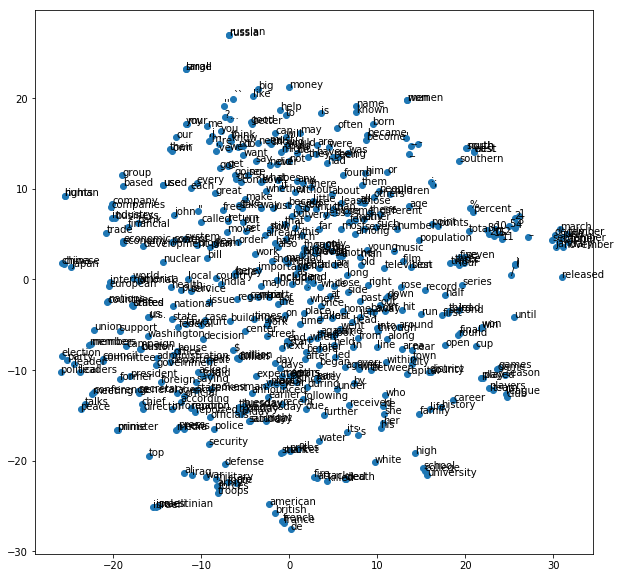

In [35]:
# Pre-trained GloVe 임베딩 벡터 시각화 : sklearn의 TSNE 사용

tsne = TSNE(n_components=2, random_state=0)
words = list(embedding_dict.keys())
vectors = [embedding_dict[word] for word in words]

Y = tsne.fit_transform(vectors[:500]) #400,000개 중 500개만 조회
plt.figure(figsize=(10,10))
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

In [ ]:
# 다시 임베딩 과정 계속

In [12]:
# Create a weight matrix for words in docs
# 훈련 데이터의 단어 집합의 모든 단어에 대해서 사전 훈련된 GloVe의 임베딩 벡터들을 맵핑
# 단어의 index 부분에 해당 vector 값을 꺼내어 넣어주기
embedding_matrix = np.zeros((vocab_size, 50)) # 단어 집합 크기의 행과 100개의 열을 가지는 행렬 생성; 값은 전부 0으로 채워진다

for word, index in t.word_index.items(): # 훈련 데이터의 단어 집합에서 단어를 1개씩 꺼내온다.
    if index > vocab_size - 1:
        break
    else:
        embedding_vector = embedding_dict.get(word) # 단어(key)에 해당되는 임베딩 벡터의 100개의 값(value)를 임시 변수에 저장
        if embedding_vector is not None: # 만약 임시 변수(임베딩 벡터) 값이 있다면
            embedding_matrix[index] = embedding_vector # 임시 변수의 값을 단어와 맵핑되는 인덱스의 행에 삽입

In [13]:
# 임베딩 1 -- Keras의 Embedding() 사용
from tensorflow.keras.layers import Embedding

embedding = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=max_length, trainable=False)
    # input_dim = vocab_size; output_dim = 100; input_length는 최대 문장 길이;
    # trainable false인 경우에는 pre-trained된 vector값이 변하지 않음 (사전 훈련된 워드 임베딩을 그대로 사용할 것이므로, 별도로 더 이상 훈련을 하지 않는다는 옵션)

In [ ]:
# nvidia-smi
# watch -n 0.1 nvidia-smi

In [19]:
padded_docs.shape

(80952, 3048)

In [20]:
try:
    embedding_result = embedding(tf.constant(padded_docs))
    print(embedding_result.shape)
except Exception as ex:
    print(ex)

# 메모리 오류가 났다

Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run Identity: Dst tensor is not initialized. [Op:Identity]


In [14]:
# 데이터 양을 대폭 줄인 것으로 다시 임베딩
try:
    embedding_result = embedding(tf.constant(padded_docs))
    print(embedding_result.shape)
except Exception as ex:
    print(ex)
    
# 겨우 성공...

(60486, 500, 50)


## CNN 사용
- CNN은 보통 image에서 많이 사용된다고 알려져 있지만, 텍스트에서도 좋은 효과를 낼 수 있다는 것을 “Convolutional Neural Network for Sentence Classification” (Yoon Kim, NYU, 2014) 에서 입증
- RNN이 단어의 입력 순서를 중요하게 반영한다면, CNN은 문장의 지역정보를 보존하면서 각 문장 성분(단어/표현)의 등장(순서) 정보를 학습에 반영하는 구조로 풀어간다; 학습할 때 각 필터 크기를 조절하면서 언어의 특징 값을 추출
- RNN은 계산량이 너무 많음; 텍스트 분류나 시계열 예측 같은 간단한 문제에는 1D convnet이 RNN을 대신하여 더 적은 비용으로 빠르게 처리 가능; 전반적 순서가 의미가 없다면 1D convnet이 적어도 동일한 성능을 내면서 비용도 적음
- 1D convnet과 RNN 결합 --> CNN읜 속도와 경량함을 RNN의 순서 감지 능력과 결합하여, CNN을 RNN 이전에 전처리 단계로 사용하고 수천 개의 step을 가지는 긴 시퀀스를 다룰 때 경제적이면서도 빠른 응답 속도를 가지게 할 수 있음

In [ ]:
# 자연어 처리 분야에선 합성곱 연산의 경우 주로 케라스 모듈 중 Conv1D를 사용
# MaxPooling1D 함께 활용
# 합성곱의 방향 : 한 방향(가로); 출력값 : 1-D Array(Vector)
# 일렬로 쭉 늘어졌기 때문에

In [ ]:
# label/target을 아직 여기선 사용하지 않을 것이기에 훈련을 시킬 수 없다
# 그렇기에 이런 식의 layer을 쌓아 model 생성 X
model = Sequential()
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.compile()
model.fit()

In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, SeparableConv1D, MaxPooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import Embedding, Dropout, Flatten, Dense
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.utils import to_categorical
from sklearn.manifold import TSNE

In [3]:
#config = tf.compat.v1.ConfigProto()
#config.gpu_options.allow_growth = True
#sess = tf.compat.v1.Session(config=config)

In [ ]:
# Keras 딥러닝 layer에서 사용 가능한 기능들을 manually 적용

### 다양한 모델 시도 및 실험

In [22]:
# CNN 적용 : Conv1D + MaxPooling1D

# 1번째 layer
first_conv_applied = Conv1D(64, 5, activation='relu')(test_embedding_result)
    # filters=64: 필터 갯수, 출력의 차원수를 의미
    # kernel_size=5: 필터의 크기; 리스트 혹은 튜플 형태로 지정; 합성곱이 적용되는 윈도우의 길이를 나타냄
first_max_pool_applied = MaxPooling1D(pool_size=4)(first_conv_applied)
first_drop_out_applied = Dropout(0.3)(first_max_pool_applied)
print(first_drop_out_applied.shape)
#print(first_drop_out_applied)

# 2번째 layer
second_conv_applied = Conv1D(128, 5, activation='relu')(first_drop_out_applied)
second_max_pool_applied = MaxPooling1D(pool_size=4)(second_conv_applied)
second_drop_out_applied = Dropout(0.3)(second_max_pool_applied)
print(second_drop_out_applied.shape)
#print(second_drop_out_applied)

# 3번째 layer
third_conv_applied = Conv1D(256, 5, activation='relu')(second_drop_out_applied)
third_max_pool_applied = MaxPooling1D(pool_size=4)(third_conv_applied)
third_drop_out_applied = Dropout(0.3)(third_max_pool_applied)
print(third_drop_out_applied.shape)
#print(third_drop_out_applied)

# CNN은 전역풀링층(Global Average/Max Pooling) 또는 Flatten()으로 마무리
# Flatten() 사용하여 1차원으로 펴주기
text_data_flattened = Flatten()(third_drop_out_applied)
print(text_data_flattened.shape)
print(text_data_flattened)

(10, 272, 64)
(10, 67, 128)
(10, 15, 256)
(10, 3840)
tf.Tensor(
[[0.1820065  0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.31844628 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.26216236 0.         0.         ... 0.         0.         0.        ]
 [0.34001914 0.         0.         ... 0.84466124 0.2953177  0.        ]
 [0.04820913 0.         0.04454558 ... 0.         0.         0.        ]], shape=(10, 3840), dtype=float32)


In [23]:
# SeparableConv1D 사용
# 일반적인 합성곱이 동일하지만 더 빠르고 가볍고 효율적으로 표현을 학습하는 깊이별 분할 합성곱(depthwise separable convolution)
# 입력 채널별로 따로따로 공간 방향의 합성곱을 수행

from tensorflow.keras.layers import SeparableConv1D, MaxPooling1D, Dropout, Flatten

# 1번째 layer
first_conv_applied = SeparableConv1D(64, 5, activation='relu')(test_embedding_result)
first_max_pool_applied = MaxPooling1D(pool_size=4)(first_conv_applied)
first_drop_out_applied = Dropout(0.3)(first_max_pool_applied)
print(first_drop_out_applied.shape)

# 2번째 layer
second_conv_applied = SeparableConv1D(128, 5, activation='relu')(first_drop_out_applied)
second_max_pool_applied = MaxPooling1D(pool_size=4)(second_conv_applied)
second_drop_out_applied = Dropout(0.3)(second_max_pool_applied)
print(second_drop_out_applied.shape)

# 3번째 layer
third_conv_applied = SeparableConv1D(256, 5, activation='relu')(second_drop_out_applied)
third_max_pool_applied = MaxPooling1D(pool_size=4)(third_conv_applied)
third_drop_out_applied = Dropout(0.3)(third_max_pool_applied)
print(third_drop_out_applied.shape)

# 전역풀링층(Global Average/Max Pooling) 또는 Flatten()으로 마무리
# Flatten() 사용하여 1차원으로 펴주기
text_data_flattened = Flatten()(third_drop_out_applied)
print(text_data_flattened.shape)
print(text_data_flattened)

(10, 272, 64)
(10, 67, 128)
(10, 15, 256)
(10, 3840)
tf.Tensor(
[[1.5234390e-03 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [7.8502035e-04 2.4610682e-04 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.7211036e-03 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [1.4059035e-03 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.1366272e-03 0.0000000e+00 0.0000000e+00 ... 1.0796952e-03
  0.0000000e+00 5.7935624e-05]
 [9.0714160e-04 2.0068536e-04 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]], shape=(10, 3840), dtype=float32)


In [20]:
# Global Average/Max Pooling (전역 풀링) 사용

# 1번째 layer
first_conv_applied = SeparableConv1D(64, 5, activation='relu')(test_embedding_result)
first_max_pool_applied = MaxPooling1D(pool_size=4)(first_conv_applied)
first_drop_out_applied = Dropout(0.3)(first_max_pool_applied)
print(first_drop_out_applied.shape)

# 2번째 layer
second_conv_applied = SeparableConv1D(128, 5, activation='relu')(first_drop_out_applied)
second_max_pool_applied = MaxPooling1D(pool_size=4)(second_conv_applied)
second_drop_out_applied = Dropout(0.3)(second_max_pool_applied)
print(second_drop_out_applied.shape)

# 3번째 layer
third_conv_applied = SeparableConv1D(256, 5, activation='relu')(second_drop_out_applied)

# GlobalMaxPooling1D()
glob_max_pool_applied = GlobalMaxPooling1D()(third_conv_applied)
print(glob_max_pool_applied.shape)
# GlobalAveragePooling1D()
glob_avg_pool_applied = GlobalAveragePooling1D()(third_conv_applied)
print(glob_avg_pool_applied.shape)

(10, 272, 64)
(10, 67, 128)
(10, 256)
(10, 256)


In [148]:
# CNN + Recurrent Neural Network(RNN) 사용

# 1번째 layer
first_conv_applied = SeparableConv1D(64, 5, activation='relu')(test_embedding_result)
first_max_pool_applied = MaxPooling1D(pool_size=4)(first_conv_applied)
first_drop_out_applied = Dropout(0.3)(first_max_pool_applied)
print(first_drop_out_applied.shape)

# 2번째 layer
second_conv_applied = SeparableConv1D(128, 5, activation='relu')(first_drop_out_applied)
second_max_pool_applied = MaxPooling1D(pool_size=4)(second_conv_applied)
second_drop_out_applied = Dropout(0.3)(second_max_pool_applied)
print(second_drop_out_applied.shape)

# 3번째 layer
third_conv_applied = SeparableConv1D(256, 5, activation='relu')(second_drop_out_applied)
third_max_pool_applied = MaxPooling1D(pool_size=4)(third_conv_applied)
third_drop_out_applied = Dropout(0.3)(third_max_pool_applied)
print(third_drop_out_applied.shape)

# Recurrent Neural Network(RNN)
# Long Short Term Memory(LSTM) 사용
lstm_applied = LSTM(256)(third_drop_out_applied)
print(lstm_applied.shape)
print(lstm_applied)
# Gated Recurrent Unit(Gated Recurrent Unit) 사용
gru_applied = GRU(256)(third_drop_out_applied)
print(gru_applied.shape)
print(gru_applied)

(10, 272, 64)
(10, 67, 128)
(10, 15, 256)
(10, 256)
tf.Tensor(
[[-8.0843289e-05 -3.6791270e-04 -6.4249733e-05 ... -9.0546535e-05
   1.9519238e-04  2.2823896e-04]
 [-1.8632451e-06 -1.3478514e-05 -2.8256502e-06 ... -6.8535737e-06
   4.0166401e-06  1.3835316e-05]
 [-1.2373234e-05 -5.5111785e-05 -1.9395839e-05 ... -1.8369885e-05
   2.8549550e-05  3.7947448e-05]
 ...
 [-1.1913069e-05 -7.4201555e-05 -2.3536721e-05 ... -1.8782310e-05
   3.7651029e-05  4.0657756e-05]
 [-4.2961264e-04 -1.0359280e-03 -5.8856835e-06 ... -2.3490742e-04
   1.0445771e-03  7.7025243e-04]
 [-4.2689721e-06 -1.0308417e-05 -4.8424795e-06 ... -4.3052778e-06
   3.2704640e-06  1.0627952e-05]], shape=(10, 256), dtype=float32)
(10, 256)
tf.Tensor(
[[ 3.13869641e-05 -7.74973068e-06 -4.09812455e-05 ... -3.52541292e-07
   2.04782937e-05  2.06051282e-05]
 [-1.24546249e-08  1.48813740e-07 -8.24400530e-08 ...  1.30438735e-07
   8.62759748e-08  1.92516580e-07]
 [ 4.46658362e-07  6.88172804e-07 -9.00181988e-07 ...  1.46629404e-07
   

### 본격적으로 데이터셋을 모델에 적용
- 그나마 가벼울 것 같은 SeparableConv1D 사용

In [15]:
# [실제 적용] 불러온 임베딩 벡터 데이터 적용
# 1번째 layer
first_conv_applied = SeparableConv1D(32, 3, activation='relu')(embedding_result)
first_max_pool_applied = MaxPooling1D(pool_size=2)(first_conv_applied)
first_drop_out_applied = Dropout(0.3)(first_max_pool_applied)
print(first_drop_out_applied.shape)

# 2번째 layer
second_conv_applied = SeparableConv1D(32, 3, activation='relu')(first_drop_out_applied)
second_max_pool_applied = MaxPooling1D(pool_size=2)(second_conv_applied)
second_drop_out_applied = Dropout(0.3)(second_max_pool_applied)
print(second_drop_out_applied.shape)

# 3번째 layer
third_conv_applied = SeparableConv1D(32, 3, activation='relu')(second_drop_out_applied)

# GlobalMaxPooling1D()
#glob_max_pool_applied = GlobalMaxPooling1D()(third_conv_applied)
#print(glob_max_pool_applied.shape)

# GlobalAveragePooling1D()
glob_avg_pool_applied = GlobalAveragePooling1D()(third_conv_applied)
print(glob_avg_pool_applied.shape)

ResourceExhaustedError: OOM when allocating tensor with shape[60486,1,498,32] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Conv2D] name: separable_conv1d/separable_conv2d/

In [ ]:
# 계속 실패...
# 메모리 오류를 해결해야 합니다. 데이터 양이 너무 많은게 문제입니다. 데이터 크기가 너무 커요.

In [ ]:
# 여기까지도 사실 데이터양을 엄청나게 줄이고 줄인 것이지만, 결국 계속 메모리 오류 발생

In [ ]:
# 이 이전에도 수많은 메모리 오류를 겪고 해결하고나면, 또 다른 메모리 문제들을 마주하네요. 도저히 어떻게 해결을 못 하겠습니다.

In [ ]:
# 데이터 양을 대폭 줄이면 가능은 합니다.
# 진짜 많은 것을 포기하고 데이터 양을 대폭 줄이는 것이 답일 것 같은데, 그것은 여러분께 맡길게요.
# 왜냐하면 이미지 처리한 데이터와 메타 데이터 처리한 데이터와 합쳐야 하는데, 결국 여기 텍스트 처리에서 많은 데이터를 줄이게 되면 다른 데이터들도 같이 줄여야 하니까요.